In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [60]:
public_health = pd.read_csv('../../Data/public health/public_health10_21.csv')#, index_col='시도별')
pop_house_car = pd.read_csv('../../Data/sangwonKim/pop_house_car.csv')#, index_col='시도별')
pay_companies = pd.read_csv('../../Data/companies/정제_임금_기업_통합(2013~2020).csv')

In [61]:
df = pd.merge(public_health,pop_house_car, how='right', right_on=['년도','시도'], left_on=['시점','시도별'])
df 

,시도별,의원,병원,종합병원,상급종합병원,의사,치과의사,한의사,약사,간호사,기타보건의료인,시점,년도,시도,총 인구,남성 인구,여성 인구,주택수,빈집수,자동차등록대수
0,서울특별시,7505,212,40,17,27055.0,6643.0,4492.0,8284.0,35179.0,5985.0,2013,2013,서울특별시,10143645,5007869,5135776,NaN,NaN,38236908
1,부산광역시,2119,124,23,4,7152.0,1554.0,1465.0,2406.0,11547.0,2644.0,2013,2013,부산광역시,3527635,1747000,1780635,NaN,NaN,17823849
2,대구광역시,1576,108,7,4,5114.0,1143.0,968.0,1793.0,8189.0,1891.0,2013,2013,대구광역시,2501588,1246071,1255517,NaN,NaN,14657442
3,인천광역시,1384,51,15,2,3936.0,1041.0,761.0,1483.0,5476.0,1834.0,2013,2013,인천광역시,2879782,1448835,1430947,NaN,NaN,20338870
4,광주광역시,864,68,20,2,3112.0,867.0,602.0,1071.0,5430.0,1233.0,2013,2013,광주광역시,1472910,730216,742694,NaN,NaN,8495770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,전라북도,1190,62,12,2,NaN,NaN,NaN,NaN,NaN,NaN,2022,2022,전라북도,1769607,880592,889015,NaN,NaN,11633570
166,전라남도,958,73,25,1,NaN,NaN,NaN,NaN,NaN,NaN,2022,2022,전라남도,1817697,915272,902425,NaN,NaN,14414723
167,경상북도,1296,56,20,0,NaN,NaN,NaN,NaN,NaN,NaN,2022,2022,경상북도,2600492,1311881,1288611,NaN,NaN,18160295
168,경상남도,1703,132,23,3,NaN,NaN,NaN,NaN,NaN,NaN,2022,2022,경상남도,3280493,1651675,1628818,NaN,NaN,22355260


In [62]:
pay_companies

,년도,시도,활동,신생,소멸,상용_월평균_임금,임금상승률,"협회 및 단체, 수리 및 기타 개인서비스업_활동","협회 및 단체, 수리 및 기타 개인서비스업_신생","협회 및 단체, 수리 및 기타 개인서비스업_소멸",...,"수도, 하수 및 폐기물처리, 원료재생업_소멸","전기, 가스, 증기 및 공기조절 공급업_활동","전기, 가스, 증기 및 공기조절 공급업_신생","전기, 가스, 증기 및 공기조절 공급업_소멸",제조업_활동,제조업_신생,제조업_소멸,광업_활동,광업_신생,광업_소멸
0,2013,서울특별시,1258829,168425,150812,3168798.0,5.4,47929,5870,6229,...,27,163,45,9,74080,7362,6401,53,6,4
1,2013,부산광역시,370922,49110,43743,2520222.0,2.7,17554,1892,2093,...,30,39,14,1,35083,3208,2694,13,1,1
2,2013,대구광역시,255803,33186,28898,2315945.0,2.3,11126,1400,1301,...,24,86,11,1,29884,2640,1936,12,4,4
3,2013,인천광역시,278236,41563,37133,2609457.0,4.0,12099,1931,1769,...,35,54,10,2,30778,3168,2594,21,1,1
4,2013,광주광역시,142802,22274,19665,2417477.0,4.2,7586,1086,1086,...,7,151,62,5,9376,1051,808,15,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2020,전라북도,224779,35752,23203,3028036.0,1.2,11770,1675,1260,...,25,18102,5800,496,14377,1573,1216,90,9,8
132,2020,전라남도,219445,34249,22803,3252923.0,0.5,11167,1733,1342,...,31,10767,3502,378,14892,1720,1310,528,128,117
133,2020,경상북도,322277,44946,33437,3318498.0,1.7,17024,2354,1827,...,51,7750,2617,260,34547,3277,2702,189,13,20
134,2020,경상남도,403797,58729,45268,3260329.0,2.2,21223,3176,2337,...,45,4140,1286,130,47130,4090,3648,86,11,9


In [63]:
df = pd.merge(df, pay_companies, how='right', on=['년도','시도'])
df 

,시도별,의원,병원,종합병원,상급종합병원,의사,치과의사,한의사,약사,간호사,...,"수도, 하수 및 폐기물처리, 원료재생업_소멸","전기, 가스, 증기 및 공기조절 공급업_활동","전기, 가스, 증기 및 공기조절 공급업_신생","전기, 가스, 증기 및 공기조절 공급업_소멸",제조업_활동,제조업_신생,제조업_소멸,광업_활동,광업_신생,광업_소멸
0,서울특별시,7505,212,40,17,27055.0,6643.0,4492.0,8284.0,35179.0,...,27,163,45,9,74080,7362,6401,53,6,4
1,부산광역시,2119,124,23,4,7152.0,1554.0,1465.0,2406.0,11547.0,...,30,39,14,1,35083,3208,2694,13,1,1
2,대구광역시,1576,108,7,4,5114.0,1143.0,968.0,1793.0,8189.0,...,24,86,11,1,29884,2640,1936,12,4,4
3,인천광역시,1384,51,15,2,3936.0,1041.0,761.0,1483.0,5476.0,...,35,54,10,2,30778,3168,2594,21,1,1
4,광주광역시,864,68,20,2,3112.0,867.0,602.0,1071.0,5430.0,...,7,151,62,5,9376,1051,808,15,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,전라북도,1172,73,11,2,3682.0,929.0,941.0,1480.0,7971.0,...,25,18102,5800,496,14377,1573,1216,90,9,8
132,전라남도,940,79,22,1,3140.0,782.0,818.0,1305.0,8556.0,...,31,10767,3502,378,14892,1720,1310,528,128,117
133,경상북도,1288,73,20,0,3655.0,958.0,1050.0,1632.0,9693.0,...,51,7750,2617,260,34547,3277,2702,189,13,20
134,경상남도,1657,140,23,2,5619.0,1406.0,1291.0,2192.0,14576.0,...,45,4140,1286,130,47130,4090,3648,86,11,9


In [64]:
df.columns

Index(['시도별', '의원', '병원', '종합병원', '상급종합병원', '의사', '치과의사', '한의사', '약사', '간호사',
       '기타보건의료인', '시점', '년도', '시도', '총 인구', '남성 인구', '여성 인구', '주택수', '빈집수',
       '자동차등록대수', '활동', '신생', '소멸', '상용_월평균_임금', '임금상승률',
       '협회 및 단체, 수리 및 기타 개인서비스업_활동', '협회 및 단체, 수리 및 기타 개인서비스업_신생',
       '협회 및 단체, 수리 및 기타 개인서비스업_소멸', '예술, 스포츠 및 여가관련 서비스업_활동',
       '예술, 스포츠 및 여가관련 서비스업_신생', '예술, 스포츠 및 여가관련 서비스업_소멸',
       '보건업 및 사회복지 서비스업_활동', '보건업 및 사회복지 서비스업_신생', '보건업 및 사회복지 서비스업_소멸',
       '교육서비스업_활동', '교육서비스업_신생', '교육서비스업_소멸', '사업 시설관리, 사업지원 및 임대 서비스업_활동',
       '사업 시설관리, 사업지원 및 임대 서비스업_신생', '사업 시설관리, 사업지원 및 임대 서비스업_소멸',
       '전문, 과학 및 기술서비스업_활동', '전문, 과학 및 기술서비스업_신생', '전문, 과학 및 기술서비스업_소멸',
       '부동산업_활동', '부동산업_신생', '부동산업_소멸', '금융 및 보험업_활동', '금융 및 보험업_신생',
       '금융 및 보험업_소멸', '정보통신업_활동', '정보통신업_신생', '정보통신업_소멸', '숙박 및 음식점업_활동',
       '숙박 및 음식점업_신생', '숙박 및 음식점업_소멸', '운수 및 창고업_활동', '운수 및 창고업_신생',
       '운수 및 창고업_소멸', '도매 및 소매업_활동', '도매 및 소매업_신생', '도매 및 소매업_소멸', '건설업_활동',
       '건설업_신생', '건설

In [65]:
df.iloc[:,:11]

,시도별,의원,병원,종합병원,상급종합병원,의사,치과의사,한의사,약사,간호사,기타보건의료인
0,서울특별시,7505,212,40,17,27055.0,6643.0,4492.0,8284.0,35179.0,5985.0
1,부산광역시,2119,124,23,4,7152.0,1554.0,1465.0,2406.0,11547.0,2644.0
2,대구광역시,1576,108,7,4,5114.0,1143.0,968.0,1793.0,8189.0,1891.0
3,인천광역시,1384,51,15,2,3936.0,1041.0,761.0,1483.0,5476.0,1834.0
4,광주광역시,864,68,20,2,3112.0,867.0,602.0,1071.0,5430.0,1233.0
...,...,...,...,...,...,...,...,...,...,...,...
131,전라북도,1172,73,11,2,3682.0,929.0,941.0,1480.0,7971.0,2274.0
132,전라남도,940,79,22,1,3140.0,782.0,818.0,1305.0,8556.0,2271.0
133,경상북도,1288,73,20,0,3655.0,958.0,1050.0,1632.0,9693.0,2283.0
134,경상남도,1657,140,23,2,5619.0,1406.0,1291.0,2192.0,14576.0,3673.0


## 병원, 의료인

<AxesSubplot: >

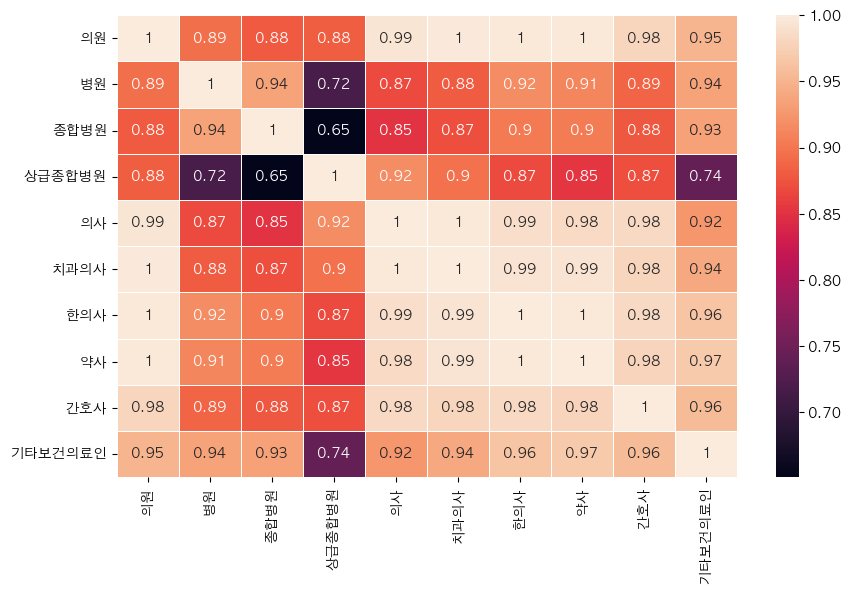

In [66]:
plt.figure(figsize = (10,6))

sns.heatmap(
    df.iloc[:,:11].corr(),
    annot=True,
    annot_kws={"size": 10},
    linewidths= 0.5,
)

In [75]:
np.corrcoef(df['총 인구'], df.iloc[:,1])[0, 1]
np.corrcoef(df['총 인구'], df.iloc[:,2])[0, 1]
# np.corrcoef(df['총 인구'], df['의원'])[0, 1]
# df['총 인구']
titles = []
corrs = []

for i in range(10):
    print(df.columns[i+1], ":", np.round(np.corrcoef(df['총 인구'], df.iloc[:,(i+1)])[0, 1], 3))
    titles.append(df.columns[i+1])
    corrs.append(np.round(np.corrcoef(df['총 인구'], df.iloc[:,(i+1)])[0, 1], 4))

# station_raw는 데이터 프레임 
df_corr = pd.DataFrame(
    {
        'feature' : titles,
        'corrs' : corrs,
    }
)
df_corr.set_index('feature', drop=True, inplace=True)
df_corr

의원 : 0.952
병원 : 0.94
종합병원 : 0.938
상급종합병원 : 0.736
의사 : 0.918
치과의사 : 0.94
한의사 : 0.959
약사 : 0.968
간호사 : 0.911
기타보건의료인 : 0.964


,corrs
feature,
의원,0.9518
병원,0.9402
종합병원,0.9376
상급종합병원,0.7363
의사,0.9177
치과의사,0.9395
한의사,0.9586
약사,0.9680
간호사,0.9113


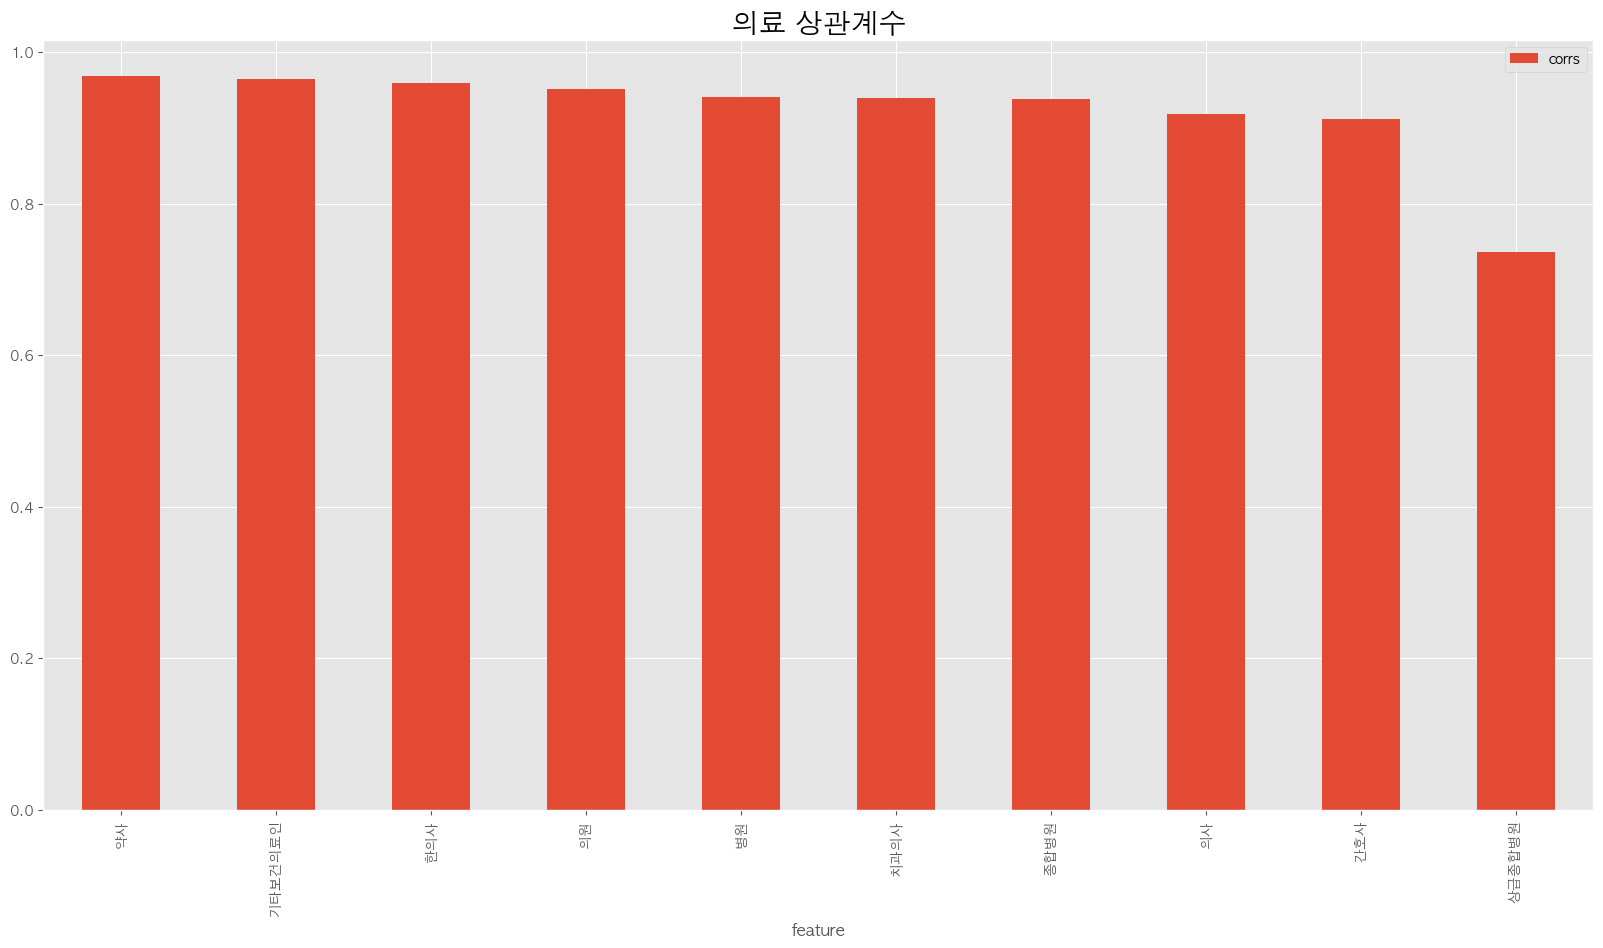

In [85]:
plt.style.use('ggplot')
df_corr.sort_values(by='corrs')[::-1].plot(
    kind='bar', #barh: 옆으로 돌린 그래프
    figsize=(20,10),
    # color=['red', '#87CEEB', 'gold'],
)

plt.title('의료 상관계수', size=20)
# plt.ylabel('득표수(단위:천명)')
# plt.xticks(rotation=0) #x라벨 로테이션
# plt.rcParams['font.size'] = 10 
# plt.colorbar()

plt.show()

> 약사 1등

In [83]:
df.iloc[:,17:19]

,주택수,빈집수
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
131,741221.0,95412.0
132,802043.0,122103.0
133,1094306.0,139770.0
134,1296944.0,150982.0


<AxesSubplot: >

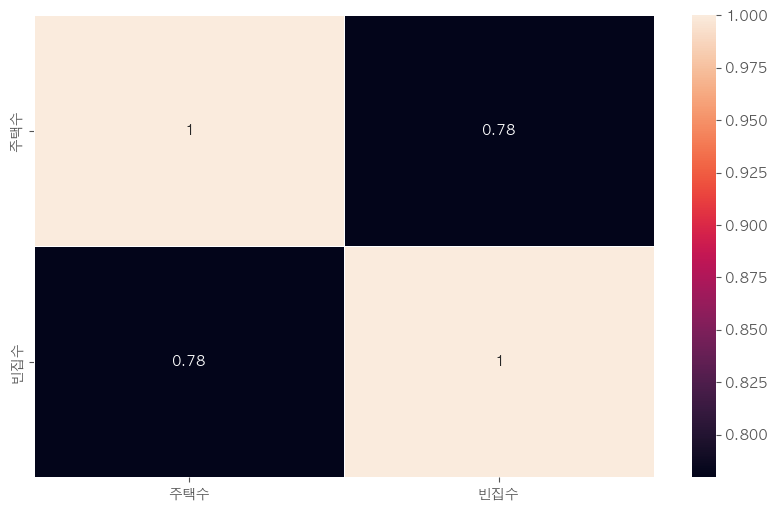

In [84]:
plt.figure(figsize = (10,6))

sns.heatmap(
    df.iloc[:,17:19].corr(),
    annot=True,
    annot_kws={"size": 10},
    linewidths= 0.5,
)

활동 : 0.99
신생 : 0.988
소멸 : 0.989


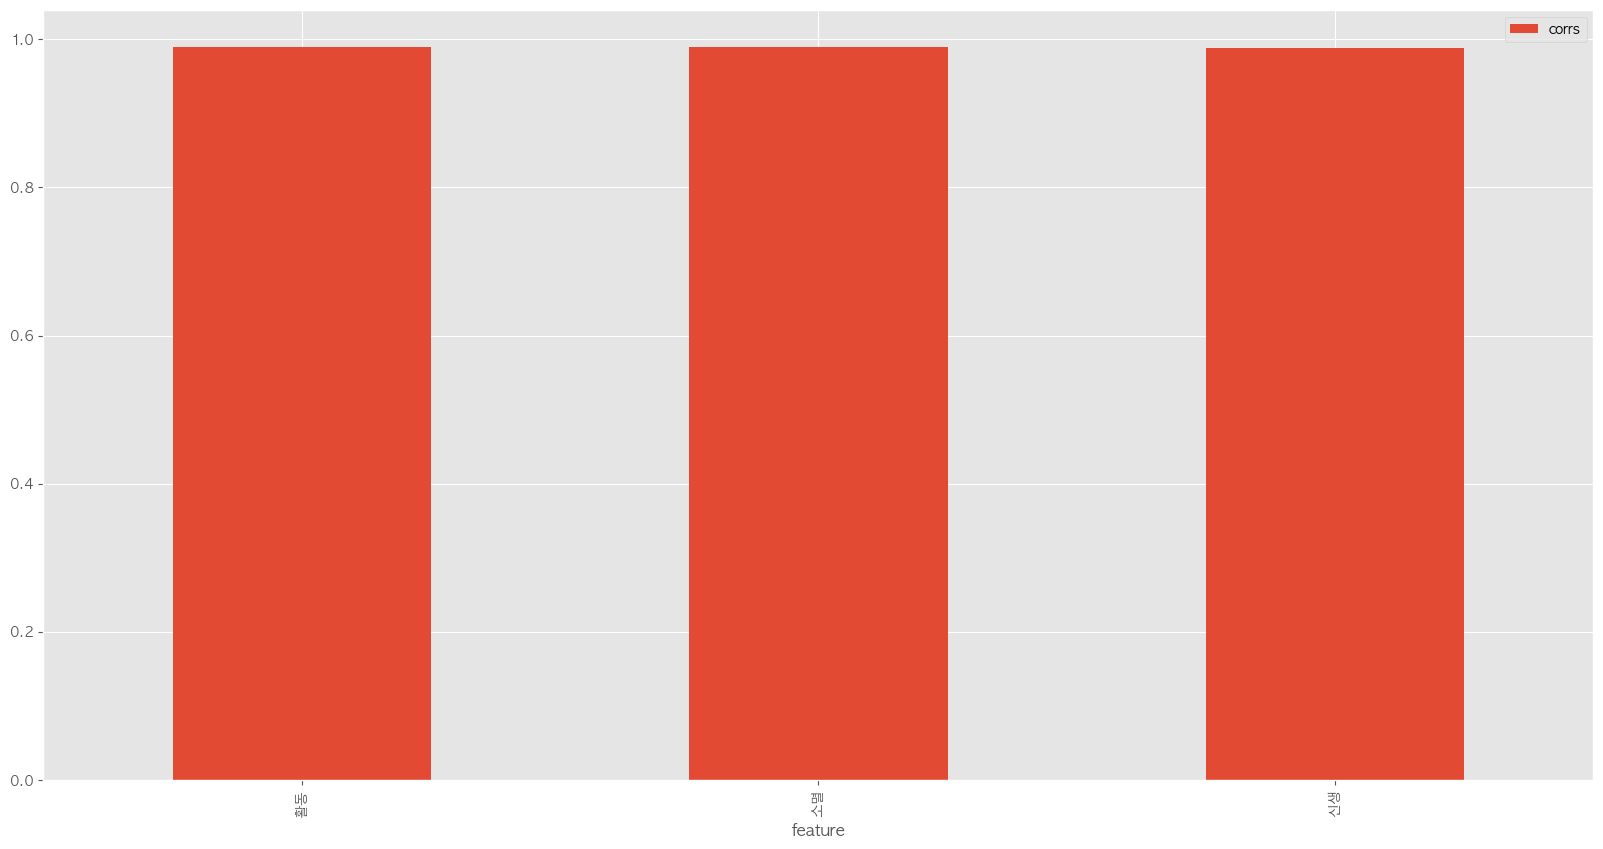

In [94]:
titles = []
corrs = []

for i in range(3):
    print(df.columns[i+20], ":", np.round(np.corrcoef(df['총 인구'], df.iloc[:,(i+20)])[0, 1], 3))
    titles.append(df.columns[i+20])
    corrs.append(np.round(np.corrcoef(df['총 인구'], df.iloc[:,(i+20)])[0, 1], 4))

# station_raw는 데이터 프레임 
df_corr = pd.DataFrame(
    {
        'feature' : titles,
        'corrs' : corrs,
    }
)
df_corr.set_index('feature', drop=True, inplace=True)
df_corr

plt.style.use('ggplot')
df_corr.sort_values(by='corrs')[::-1].plot(
    kind='bar', #barh: 옆으로 돌린 그래프
    figsize=(20,10),
    # color=['red', '#87CEEB', 'gold'],
)

plt.show()

> 활동 쓰면 됨

In [99]:
df.iloc[:, 23:25].columns

Index(['상용_월평균_임금', '임금상승률'], dtype='object')

In [101]:
def makeCorr(a, b):
    titles = []
    corrs = []

    for i in range(a):
        print(df.columns[i+b], ":", np.round(np.corrcoef(df['총 인구'], df.iloc[:,(i+b)])[0, 1], 3))
        titles.append(df.columns[i+b])
        corrs.append(np.round(np.corrcoef(df['총 인구'], df.iloc[:,(i+b)])[0, 1], 4))

    # station_raw는 데이터 프레임 
    df_corr = pd.DataFrame(
        {
            'feature' : titles,
            'corrs' : corrs,
        }
    )
    df_corr.set_index('feature', drop=True, inplace=True)
    df_corr

    plt.style.use('ggplot')
    df_corr.sort_values(by='corrs')[::-1].plot(
        kind='bar', #barh: 옆으로 돌린 그래프
        figsize=(20,10),
        # color=['red', '#87CEEB', 'gold'],
    )

    plt.show()

상용_월평균_임금 : 0.344
임금상승률 : 0.128


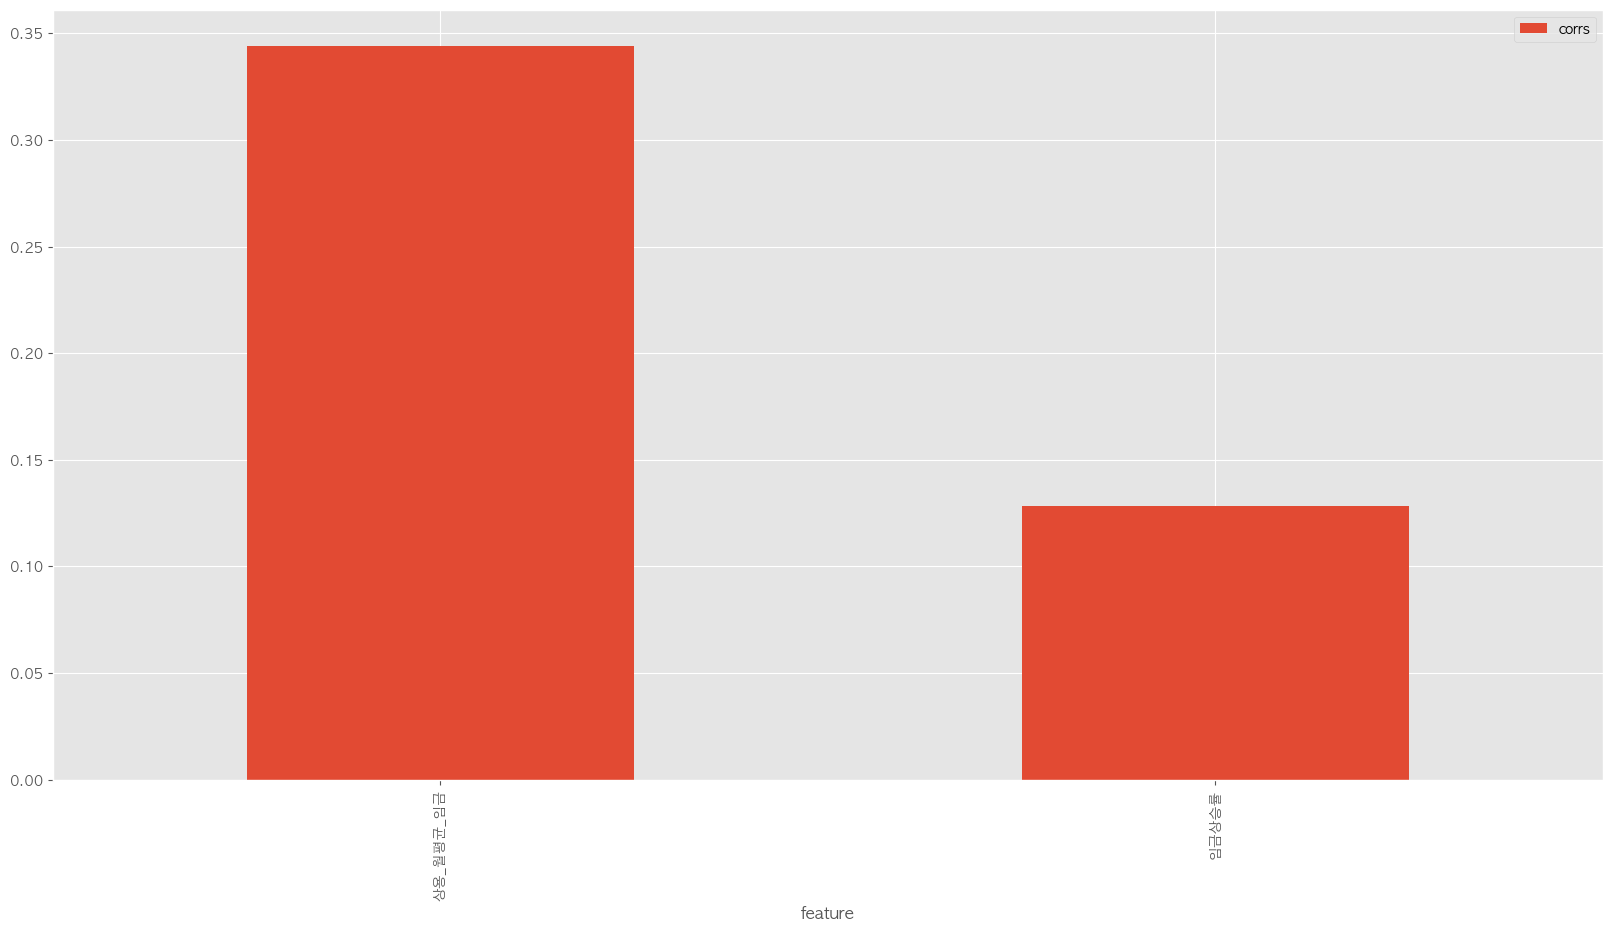

In [102]:
makeCorr(2, 23)

> 상관 없다

## 업종별 상관계수

In [108]:
df.iloc[:, 25:67].columns

Index(['협회 및 단체, 수리 및 기타 개인서비스업_활동', '협회 및 단체, 수리 및 기타 개인서비스업_신생',
       '협회 및 단체, 수리 및 기타 개인서비스업_소멸', '예술, 스포츠 및 여가관련 서비스업_활동',
       '예술, 스포츠 및 여가관련 서비스업_신생', '예술, 스포츠 및 여가관련 서비스업_소멸',
       '보건업 및 사회복지 서비스업_활동', '보건업 및 사회복지 서비스업_신생', '보건업 및 사회복지 서비스업_소멸',
       '교육서비스업_활동', '교육서비스업_신생', '교육서비스업_소멸', '사업 시설관리, 사업지원 및 임대 서비스업_활동',
       '사업 시설관리, 사업지원 및 임대 서비스업_신생', '사업 시설관리, 사업지원 및 임대 서비스업_소멸',
       '전문, 과학 및 기술서비스업_활동', '전문, 과학 및 기술서비스업_신생', '전문, 과학 및 기술서비스업_소멸',
       '부동산업_활동', '부동산업_신생', '부동산업_소멸', '금융 및 보험업_활동', '금융 및 보험업_신생',
       '금융 및 보험업_소멸', '정보통신업_활동', '정보통신업_신생', '정보통신업_소멸', '숙박 및 음식점업_활동',
       '숙박 및 음식점업_신생', '숙박 및 음식점업_소멸', '운수 및 창고업_활동', '운수 및 창고업_신생',
       '운수 및 창고업_소멸', '도매 및 소매업_활동', '도매 및 소매업_신생', '도매 및 소매업_소멸', '건설업_활동',
       '건설업_신생', '건설업_소멸', '수도, 하수 및 폐기물처리, 원료재생업_활동',
       '수도, 하수 및 폐기물처리, 원료재생업_신생', '수도, 하수 및 폐기물처리, 원료재생업_소멸'],
      dtype='object')

협회 및 단체, 수리 및 기타 개인서비스업_활동 : 0.99
협회 및 단체, 수리 및 기타 개인서비스업_신생 : 0.979
협회 및 단체, 수리 및 기타 개인서비스업_소멸 : 0.995
예술, 스포츠 및 여가관련 서비스업_활동 : 0.986
예술, 스포츠 및 여가관련 서비스업_신생 : 0.975
예술, 스포츠 및 여가관련 서비스업_소멸 : 0.991
보건업 및 사회복지 서비스업_활동 : 0.958
보건업 및 사회복지 서비스업_신생 : 0.966
보건업 및 사회복지 서비스업_소멸 : 0.918
교육서비스업_활동 : 0.987
교육서비스업_신생 : 0.986
교육서비스업_소멸 : 0.99
사업 시설관리, 사업지원 및 임대 서비스업_활동 : 0.964
사업 시설관리, 사업지원 및 임대 서비스업_신생 : 0.968
사업 시설관리, 사업지원 및 임대 서비스업_소멸 : 0.973
전문, 과학 및 기술서비스업_활동 : 0.852
전문, 과학 및 기술서비스업_신생 : 0.873
전문, 과학 및 기술서비스업_소멸 : 0.88
부동산업_활동 : 0.967
부동산업_신생 : 0.933
부동산업_소멸 : 0.948
금융 및 보험업_활동 : 0.741
금융 및 보험업_신생 : 0.775
금융 및 보험업_소멸 : 0.784
정보통신업_활동 : 0.813
정보통신업_신생 : 0.864
정보통신업_소멸 : 0.867
숙박 및 음식점업_활동 : 0.989
숙박 및 음식점업_신생 : 0.992
숙박 및 음식점업_소멸 : 0.992
운수 및 창고업_활동 : 0.984
운수 및 창고업_신생 : 0.965
운수 및 창고업_소멸 : 0.805
도매 및 소매업_활동 : 0.984
도매 및 소매업_신생 : 0.993
도매 및 소매업_소멸 : 0.99
건설업_활동 : 0.97
건설업_신생 : 0.951
건설업_소멸 : 0.978
수도, 하수 및 폐기물처리, 원료재생업_활동 : 0.807
수도, 하수 및 폐기물처리, 원료재생업_신생 : 0.762
수도, 하수 및 폐기물처리, 원료재생업_소멸 : 0.772


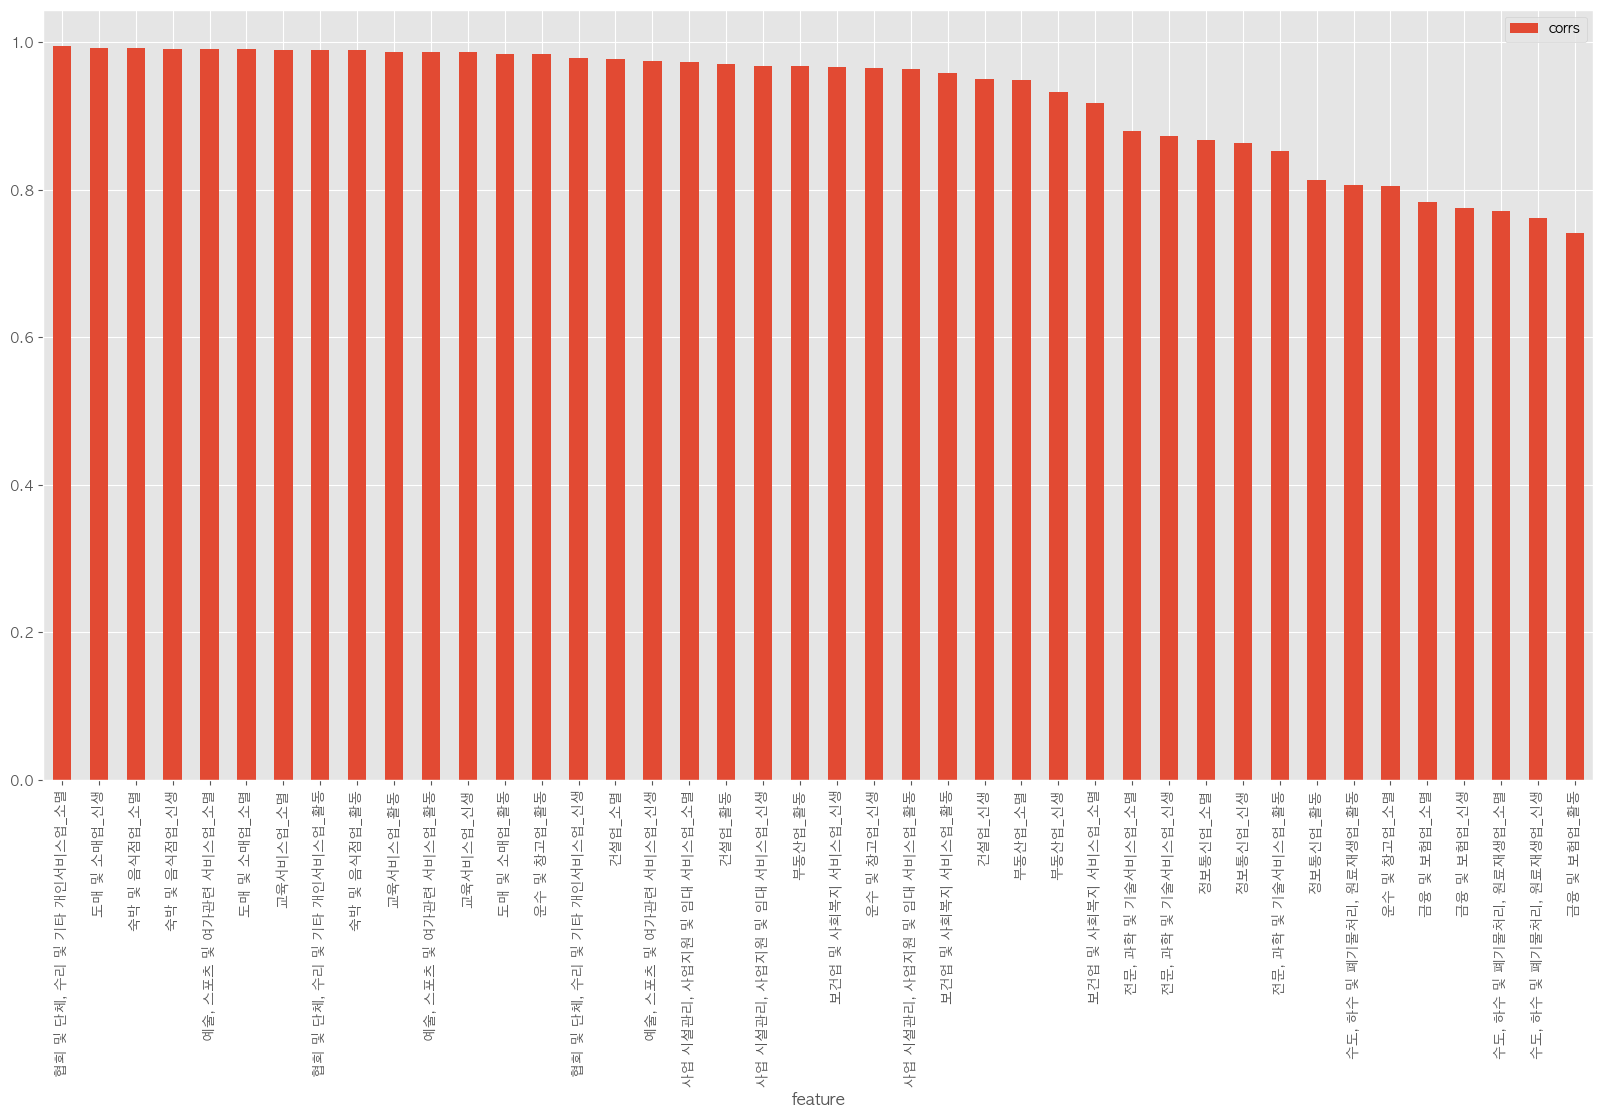

In [109]:
makeCorr(67-25, 25)

> 협회 및 단체, 수리 및 기타 개인서비스업_활동 0.99

In [119]:
df.iloc[:, 67:70].columns

Index(['전기, 가스, 증기 및 공기조절 공급업_활동', '전기, 가스, 증기 및 공기조절 공급업_신생',
       '전기, 가스, 증기 및 공기조절 공급업_소멸'],
      dtype='object')

전기, 가스, 증기 및 공기조절 공급업_활동 : -0.028
전기, 가스, 증기 및 공기조절 공급업_신생 : -0.035
전기, 가스, 증기 및 공기조절 공급업_소멸 : 0.01


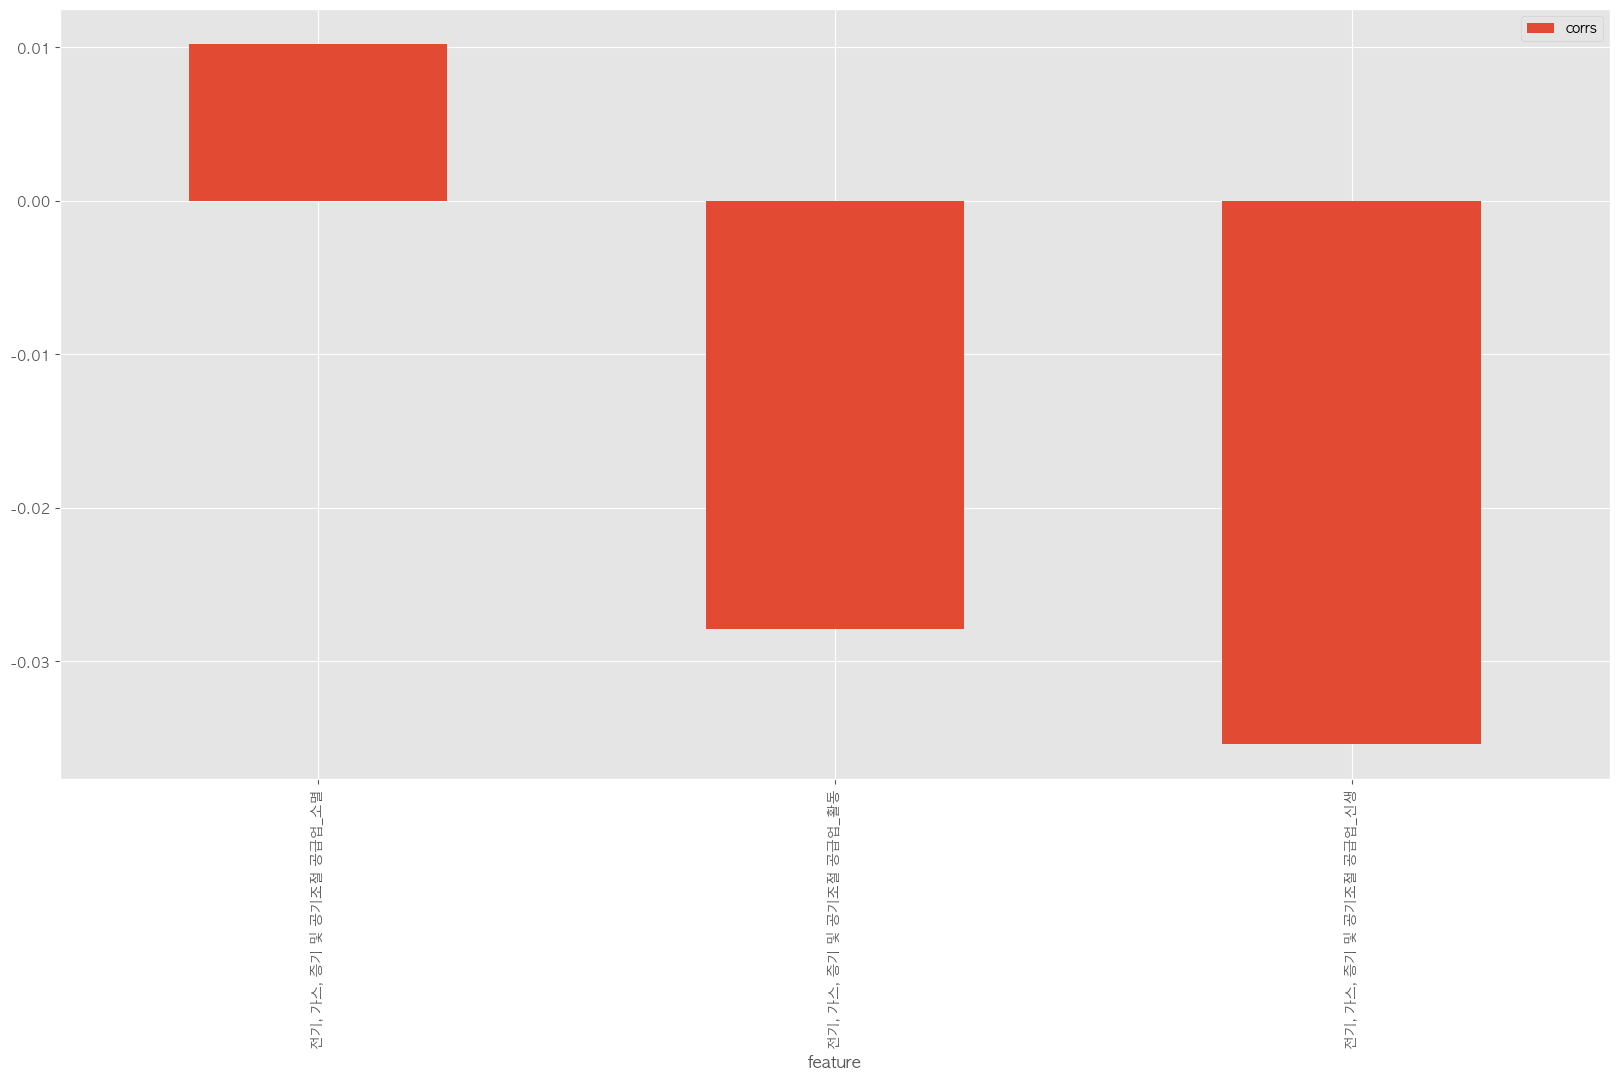

In [120]:
makeCorr(3, 67)

> 상관 x

In [121]:
df.iloc[:, 70:].columns

Index(['제조업_활동', '제조업_신생', '제조업_소멸', '광업_활동', '광업_신생', '광업_소멸'], dtype='object')

제조업_활동 : 0.958
제조업_신생 : 0.946
제조업_소멸 : 0.952


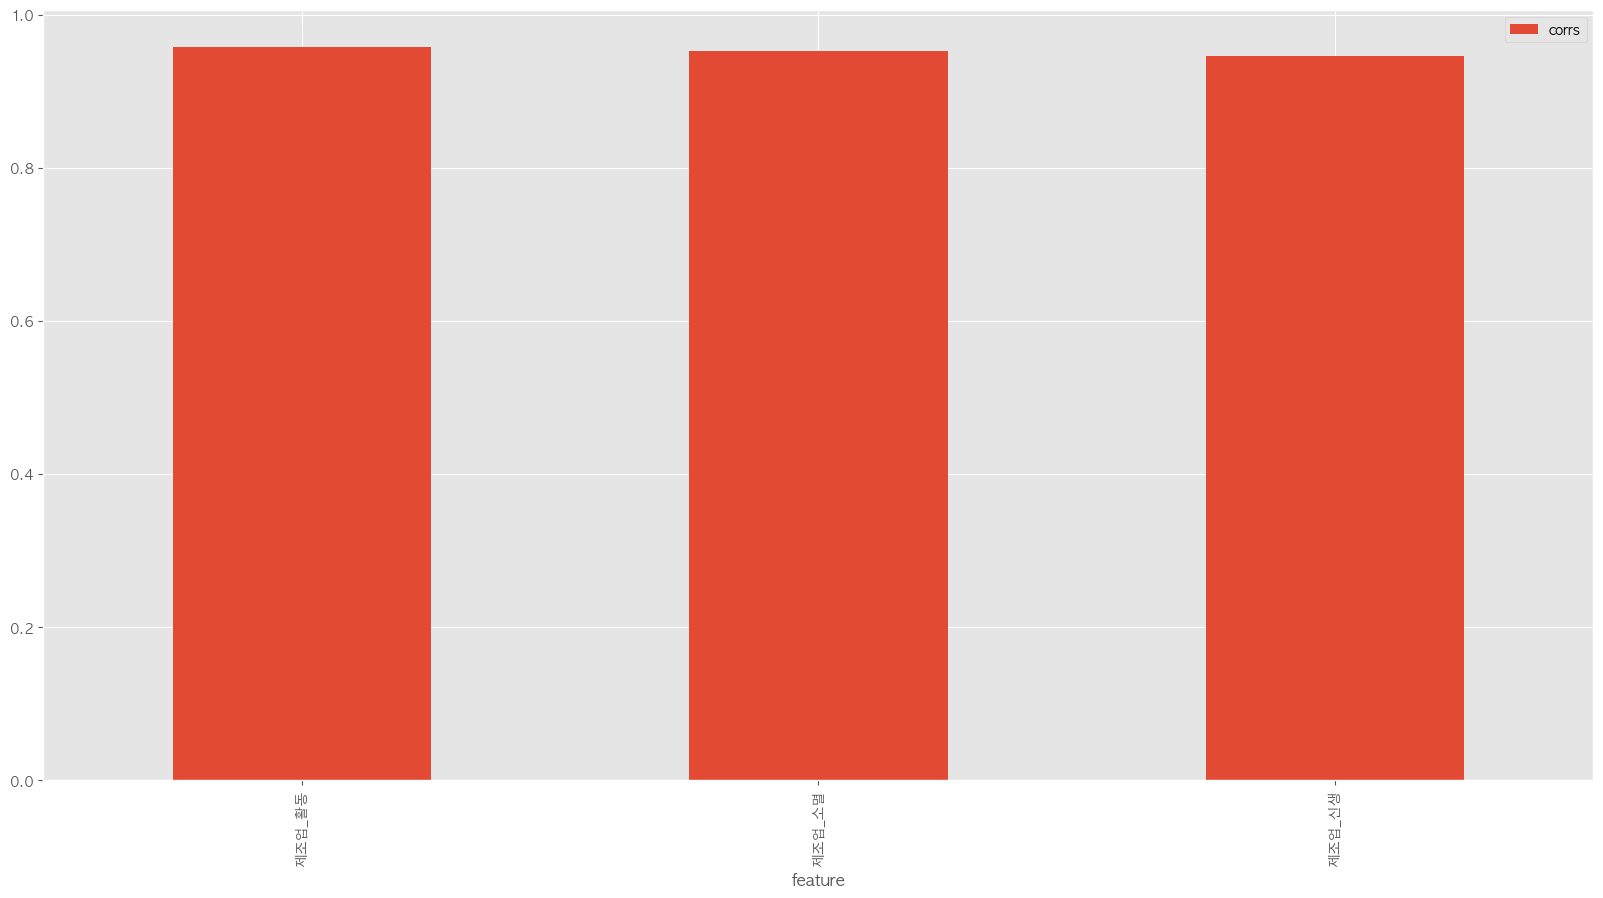

In [122]:
makeCorr(3, 70)

> 제조업_활동 0.95

In [123]:
df.iloc[:, 73:].columns

Index(['광업_활동', '광업_신생', '광업_소멸'], dtype='object')

광업_활동 : -0.022
광업_신생 : -0.05
광업_소멸 : -0.052


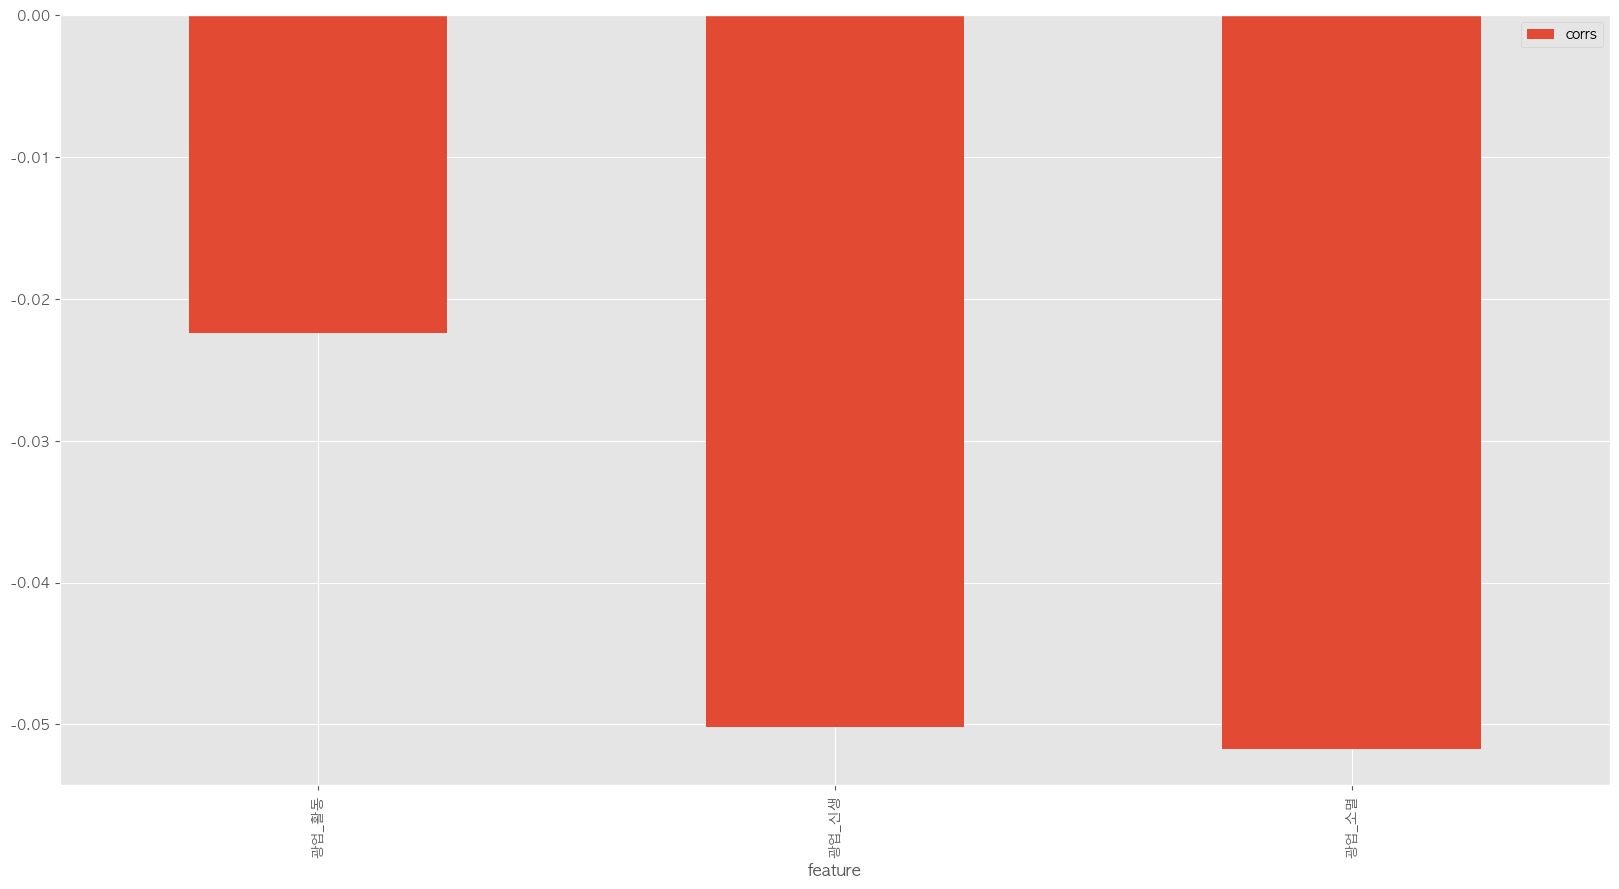

In [124]:
makeCorr(3, 73)

> 상관 없음

In [135]:
df_t = df[['총 인구', '약사', '활동', '협회 및 단체, 수리 및 기타 개인서비스업_활동', '제조업_활동']]
df_t

,총 인구,약사,활동,"협회 및 단체, 수리 및 기타 개인서비스업_활동",제조업_활동
0,10143645,8284.0,1258829,47929,74080
1,3527635,2406.0,370922,17554,35083
2,2501588,1793.0,255803,11126,29884
3,2879782,1483.0,278236,12099,30778
4,1472910,1071.0,142802,7586,9376
...,...,...,...,...,...
131,1804104,1480.0,224779,11770,14377
132,1851549,1305.0,219445,11167,14892
133,2639422,1632.0,322277,17024,34547
134,3340216,2192.0,403797,21223,47130


In [130]:
from sklearn.model_selection import train_test_split

In [168]:
df_data = df_t[['약사', '활동', '협회 및 단체, 수리 및 기타 개인서비스업_활동', '제조업_활동']]
df_label = df_t['총 인구']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_data, df_label, train_size=0.8, test_size=0.2)

In [169]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [170]:
y_predict = mlr.predict(x_test)

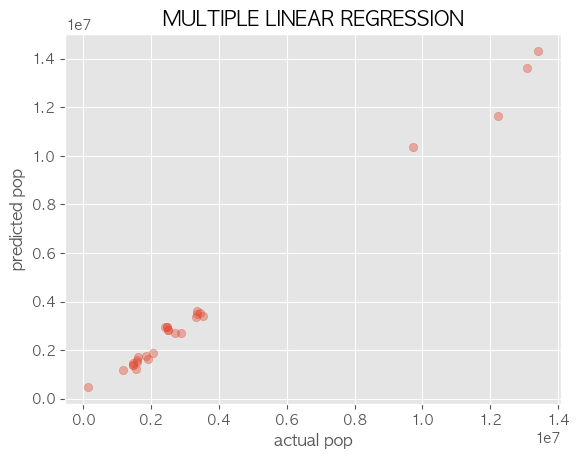

In [175]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("actual pop")
plt.ylabel("predicted pop")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [173]:
print(mlr.score(x_train, y_train))

0.9945351887359222


In [177]:
mlr.predict([[1,1,1,1]])

array([396262.9995086])